In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [0]:
moma_url = "https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv"

artwork = pd.read_csv(moma_url)

In [0]:
moma_url2 = "https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artists.csv"

artists = pd.read_csv(moma_url2)

In [0]:
print(artwork.shape)
print(artists.shape)

(138567, 29)
(16030, 9)


# Merge datasets

In [0]:
artists.columns

Index(['ConstituentID', 'DisplayName', 'ArtistBio', 'Nationality', 'Gender',
       'BeginDate', 'EndDate', 'Wiki QID', 'ULAN'],
      dtype='object')

In [0]:
artwork.columns

Index(['Title', 'Artist', 'ConstituentID', 'ArtistBio', 'Nationality',
       'BeginDate', 'EndDate', 'Gender', 'Date', 'Medium', 'Dimensions',
       'CreditLine', 'AccessionNumber', 'Classification', 'Department',
       'DateAcquired', 'Cataloged', 'ObjectID', 'URL', 'ThumbnailURL',
       'Circumference (cm)', 'Depth (cm)', 'Diameter (cm)', 'Height (cm)',
       'Length (cm)', 'Weight (kg)', 'Width (cm)', 'Seat Height (cm)',
       'Duration (sec.)'],
      dtype='object')

In [0]:
# rearrange artwork

artwork = artwork[['ConstituentID', 'Title', 'Artist', 'ArtistBio', 'Nationality',
       'BeginDate', 'EndDate', 'Gender', 'Date', 'Medium', 'Dimensions',
       'CreditLine', 'AccessionNumber', 'Classification', 'Department',
       'DateAcquired', 'Cataloged', 'ObjectID', 'URL', 'ThumbnailURL',
       'Circumference (cm)', 'Depth (cm)', 'Diameter (cm)', 'Height (cm)',
       'Length (cm)', 'Weight (kg)', 'Width (cm)', 'Seat Height (cm)',
       'Duration (sec.)']]

artwork.head()

,ConstituentID,Title,Artist,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,Dimensions,CreditLine,AccessionNumber,Classification,Department,DateAcquired,Cataloged,ObjectID,URL,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,6210,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",Otto Wagner,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",Fractional and promised gift of Jo Carole and ...,885.1996,Architecture,Architecture & Design,1996-04-09,Y,2,http://www.moma.org/collection/works/2,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN
1,7470,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",Gift of the architect in honor of Lily Auchinc...,1.1995,Architecture,Architecture & Design,1995-01-17,Y,3,http://www.moma.org/collection/works/3,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN
2,7605,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",Gift of Jo Carole and Ronald S. Lauder,1.1997,Architecture,Architecture & Design,1997-01-15,Y,4,http://www.moma.org/collection/works/4,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN
3,7056,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",Purchase and partial gift of the architect in ...,2.1995,Architecture,Architecture & Design,1995-01-17,Y,5,http://www.moma.org/collection/works/5,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN
4,7605,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",Gift of Jo Carole and Ronald S. Lauder,2.1997,Architecture,Architecture & Design,1997-01-15,Y,6,http://www.moma.org/collection/works/6,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN


In [0]:
# change ConstituentID to string

artists['ConstituentID'] = artists['ConstituentID'].astype(str)

artists.dtypes

ConstituentID     object
DisplayName       object
ArtistBio         object
Nationality       object
Gender            object
BeginDate          int64
EndDate            int64
Wiki QID          object
ULAN             float64
dtype: object

In [0]:
artwork.rename(columns={'ConstituentID':'ID'}, inplace = True)
artists.rename(columns={'ConstituentID':'ID'}, inplace = True)

In [0]:
artwork.dtypes

ID                     object
Title                  object
Artist                 object
ArtistBio              object
Nationality            object
BeginDate              object
EndDate                object
Gender                 object
Date                   object
Medium                 object
Dimensions             object
CreditLine             object
AccessionNumber        object
Classification         object
Department             object
DateAcquired           object
Cataloged              object
ObjectID                int64
URL                    object
ThumbnailURL           object
Circumference (cm)    float64
Depth (cm)            float64
Diameter (cm)         float64
Height (cm)           float64
Length (cm)           float64
Weight (kg)           float64
Width (cm)            float64
Seat Height (cm)      float64
Duration (sec.)       float64
dtype: object

In [0]:
artists.head(2)

,ID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,NaN,NaN


In [0]:
artwork.head(2)

,ID,Title,Artist,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,Dimensions,CreditLine,AccessionNumber,Classification,Department,DateAcquired,Cataloged,ObjectID,URL,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,6210,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",Otto Wagner,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",Fractional and promised gift of Jo Carole and ...,885.1996,Architecture,Architecture & Design,1996-04-09,Y,2,http://www.moma.org/collection/works/2,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN
1,7470,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",Gift of the architect in honor of Lily Auchinc...,1.1995,Architecture,Architecture & Design,1995-01-17,Y,3,http://www.moma.org/collection/works/3,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN


In [0]:
# so what I want to do is join DisplayName	ArtistBio	Nationality	Gender	BeginDate	EndDate
# by ConstituentID to artwork

# columns we want
columns = ['ID', 'DisplayName',	'ArtistBio', 'Nationality',	'Gender',	'BeginDate', 'EndDate']


# the problem of duplicates

# artwork['g'] = artwork.groupby('ID').cumcount()
# artists['g'] = artists.groupby('ID').cumcount()
# merged = pd.merge(artwork, artists, on=['ID', 'g'], how='outer')

merged = pd.merge(artwork, artists, on='ID', how='outer')

merged.head()


,ID,Title,Artist,ArtistBio_x,Nationality_x,BeginDate_x,EndDate_x,Gender_x,Date,Medium,Dimensions,CreditLine,AccessionNumber,Classification,Department,DateAcquired,Cataloged,ObjectID,URL,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.),DisplayName,ArtistBio_y,Nationality_y,Gender_y,BeginDate_y,EndDate_y,Wiki QID,ULAN
0,6210,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",Otto Wagner,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",Fractional and promised gift of Jo Carole and ...,885.1996,Architecture,Architecture & Design,1996-04-09,Y,2.0,http://www.moma.org/collection/works/2,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN,Otto Wagner,"Austrian, 1841–1918",Austrian,Male,1841.0,1918.0,Q84287,500016971.0
1,6210,Armchair,Otto Wagner,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1902,Beech wood and aluminum,"30 7/8 x 22 1/4 x 20 1/4"" (78.5 x 56.5 x 51.5 ...",Estée and Joseph Lauder Design Fund,479.1978,Design,Architecture & Design,1978-09-27,Y,4023.0,http://www.moma.org/collection/works/4023,http://www.moma.org/media/W1siZiIsIjIyOTgzNyJd...,NaN,51.5000,NaN,78.5000,NaN,NaN,56.5000,NaN,NaN,Otto Wagner,"Austrian, 1841–1918",Austrian,Male,1841.0,1918.0,Q84287,500016971.0
2,6210,Stool,Otto Wagner,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1904,"Bent beech wood, molded plywood, and aluminum","18 1/2 x 16 x 16"" (47 x 40.6 x 40.6 cm)",Estée and Joseph Lauder Design Fund,480.1978,Design,Architecture & Design,1978-09-27,Y,4026.0,http://www.moma.org/collection/works/4026,http://www.moma.org/media/W1siZiIsIjU5MTMwIl0s...,NaN,40.6401,NaN,46.9901,NaN,NaN,40.6401,NaN,NaN,Otto Wagner,"Austrian, 1841–1918",Austrian,Male,1841.0,1918.0,Q84287,500016971.0
3,6210,Railing,Otto Wagner,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1899,Painted cast-iron,"28 1/4 x 46 1/2 x 3"" (72.4 x 117.5 x 7.6 cm)",Dorothy Cullman Purchase Fund,1394.2001,Architecture,Architecture & Design,2001-05-11,Y,82125.0,http://www.moma.org/collection/works/82125,http://www.moma.org/media/W1siZiIsIjYyMTEzIl0s...,NaN,7.6000,NaN,72.4000,NaN,NaN,117.5000,NaN,NaN,Otto Wagner,"Austrian, 1841–1918",Austrian,Male,1841.0,1918.0,Q84287,500016971.0
4,7470,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",Gift of the architect in honor of Lily Auchinc...,1.1995,Architecture,Architecture & Design,1995-01-17,Y,3.0,http://www.moma.org/collection/works/3,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN,Christian de Portzamparc,"French, born 1944",French,Male,1944.0,0.0,Q312838,500024982.0


In [0]:
merged.shape

(142679, 37)

In [0]:
# rearrange columns

merged.columns

merged = merged[['ID', 'Title', 'Artist', 'ArtistBio_x', 'Nationality_x', 'BeginDate_x',
       'EndDate_x', 'Gender_x', 'Date', 'DisplayName', 'ArtistBio_y', 'Nationality_y', 'Gender_y',
       'BeginDate_y', 'EndDate_y', 'Medium', 'Dimensions', 'CreditLine',
       'AccessionNumber', 'Classification', 'Department', 'DateAcquired',
       'Cataloged', 'ObjectID', 'URL', 'ThumbnailURL', 'Circumference (cm)',
       'Depth (cm)', 'Diameter (cm)', 'Height (cm)', 'Length (cm)',
       'Weight (kg)', 'Width (cm)', 'Seat Height (cm)', 'Duration (sec.)',
       'Wiki QID', 'ULAN']]

# Cleaning

In [0]:
# make copy

merged2 = merged

In [0]:
merged2.head(2)

,ID,Title,Artist,ArtistBio_x,Nationality_x,BeginDate_x,EndDate_x,Gender_x,Date,DisplayName,ArtistBio_y,Nationality_y,Gender_y,BeginDate_y,EndDate_y,Medium,Dimensions,CreditLine,AccessionNumber,Classification,Department,DateAcquired,Cataloged,ObjectID,URL,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.),Wiki QID,ULAN
0,6210,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",Otto Wagner,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Otto Wagner,"Austrian, 1841–1918",Austrian,Male,1841.0,1918.0,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",Fractional and promised gift of Jo Carole and ...,885.1996,Architecture,Architecture & Design,1996-04-09,Y,2.0,http://www.moma.org/collection/works/2,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,NaN,NaN,NaN,48.6,NaN,NaN,168.9,NaN,NaN,Q84287,500016971.0
1,6210,Armchair,Otto Wagner,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1902,Otto Wagner,"Austrian, 1841–1918",Austrian,Male,1841.0,1918.0,Beech wood and aluminum,"30 7/8 x 22 1/4 x 20 1/4"" (78.5 x 56.5 x 51.5 ...",Estée and Joseph Lauder Design Fund,479.1978,Design,Architecture & Design,1978-09-27,Y,4023.0,http://www.moma.org/collection/works/4023,http://www.moma.org/media/W1siZiIsIjIyOTgzNyJd...,NaN,51.5,NaN,78.5,NaN,NaN,56.5,NaN,NaN,Q84287,500016971.0


## Delete duplicate columns

In [0]:
# we can delete Artist, ArtistBio_x

merged2 = merged2.drop(['Artist', 'ArtistBio_x', 'Nationality_x', 'BeginDate_x', 'EndDate_x', 'Gender_x', 'ArtistBio_y'], axis=1)

In [0]:
merged2.head(2)

,ID,Title,Date,DisplayName,Nationality_y,Gender_y,BeginDate_y,EndDate_y,Medium,Dimensions,CreditLine,AccessionNumber,Classification,Department,DateAcquired,Cataloged,ObjectID,URL,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.),Wiki QID,ULAN
0,6210,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",1896,Otto Wagner,Austrian,Male,1841.0,1918.0,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",Fractional and promised gift of Jo Carole and ...,885.1996,Architecture,Architecture & Design,1996-04-09,Y,2.0,http://www.moma.org/collection/works/2,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,NaN,NaN,NaN,48.6,NaN,NaN,168.9,NaN,NaN,Q84287,500016971.0
1,6210,Armchair,1902,Otto Wagner,Austrian,Male,1841.0,1918.0,Beech wood and aluminum,"30 7/8 x 22 1/4 x 20 1/4"" (78.5 x 56.5 x 51.5 ...",Estée and Joseph Lauder Design Fund,479.1978,Design,Architecture & Design,1978-09-27,Y,4023.0,http://www.moma.org/collection/works/4023,http://www.moma.org/media/W1siZiIsIjIyOTgzNyJd...,NaN,51.5,NaN,78.5,NaN,NaN,56.5,NaN,NaN,Q84287,500016971.0


In [0]:
# rename columns

merged2.rename(columns={'DisplayName':'Artist', 
                        'Nationality_y':'Nationality', 'Gender_y':'Gender',
                        'BeginDate_y': 'Birth', 'EndDate_y': 'Death'}, inplace = True)


In [0]:
merged2.head(2)

,ID,Title,Date,Artist,Nationality,Gender,Birth,Death,Medium,Dimensions,CreditLine,AccessionNumber,Classification,Department,DateAcquired,Cataloged,ObjectID,URL,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.),Wiki QID,ULAN
0,6210,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",1896,Otto Wagner,Austrian,Male,1841.0,1918.0,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",Fractional and promised gift of Jo Carole and ...,885.1996,Architecture,Architecture & Design,1996-04-09,Y,2.0,http://www.moma.org/collection/works/2,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,NaN,NaN,NaN,48.6,NaN,NaN,168.9,NaN,NaN,Q84287,500016971.0
1,6210,Armchair,1902,Otto Wagner,Austrian,Male,1841.0,1918.0,Beech wood and aluminum,"30 7/8 x 22 1/4 x 20 1/4"" (78.5 x 56.5 x 51.5 ...",Estée and Joseph Lauder Design Fund,479.1978,Design,Architecture & Design,1978-09-27,Y,4023.0,http://www.moma.org/collection/works/4023,http://www.moma.org/media/W1siZiIsIjIyOTgzNyJd...,NaN,51.5,NaN,78.5,NaN,NaN,56.5,NaN,NaN,Q84287,500016971.0


## Gender

In [0]:
merged2['Gender'].value_counts(dropna=False).head(20)

Male          106478
Female         18157
NaN            18012
male              30
Non-Binary         2
Name: Gender, dtype: int64

In [0]:
# so there's male that we need to convert to Male

merged2['Gender'].replace('male', 'Male', inplace=True)

In [0]:
merged2['Gender'].value_counts(dropna=False).head(20)

Male          106508
Female         18157
NaN            18012
Non-Binary         2
Name: Gender, dtype: int64

In [0]:
merged2.shape

(142679, 30)

## Date

[Helpful tutorial](https://www.dataquest.io/blog/data-cleaning-with-python/)

In [0]:
# date has a small minority with non standard information
# I'm not sure there's a right way to deal with this

merged2['Date'].value_counts(dropna=False).head(1000)

NaN                                      6520
1967                                     1866
1971                                     1833
1966                                     1666
1968                                     1621
1965                                     1596
1973                                     1492
1969                                     1483
1964                                     1422
1970                                     1400
1962                                     1352
1963                                     1241
2003                                     1223
1991                                     1220
1972                                     1162
1930                                     1129
1928                                     1117
1976                                     1103
1980                                     1102
2001                                     1074
1931                                     1017
1961                              

In [0]:
import string

def remove_punctuation(row):
    # Initial date contains the current value for the Date column
    initial_date = str(row['Date'])
    # remove leading/trailing whitespace, but not inside
    initial_date = initial_date.strip()
    # replace inside whitespace with punctuation
    initial_date = initial_date.replace(" ", "?")
    # Split initial_date into two elements if "-" is found
    final_date = initial_date.translate(str.maketrans({a:None for a in string.punctuation}))
    return final_date

# Assign the results of "remove_punctuation" to the 'Date' column.
# We want Pandas to go row-wise so we set "axis=1". We would use "axis=0" for column-wise.
merged2['Date'] = merged2.apply(lambda row: remove_punctuation(row), axis=1)
merged2['Date'].value_counts()

nan                                                     6520
1967                                                    1964
1966                                                    1889
1971                                                    1865
1968                                                    1742
1965                                                    1689
1973                                                    1575
1969                                                    1561
1964                                                    1472
1970                                                    1441
1962                                                    1399
2003                                                    1392
1963                                                    1289
1991                                                    1251
1972                                                    1237
1928                                                    1137
1976                    

In [0]:
# for some reason the above function does not remove '–'

def clean_split_dates(row):
    # Initial date contains the current value for the Date column
    initial_date = str(row['Date'])
    # Split initial_date into two elements if '–' is found
    split_date = initial_date.split('–')
     # If a "-"  is found, split_date will contain a list with at least two items
    if len(split_date) > 1:
        final_date = split_date[0]
    # If no '–' is found, split_date will just contain 1 item, the initial_date
    else:
        final_date = initial_date
    return final_date
# Assign the results of "clean_split_dates" to the 'Date' column.
# We want Pandas to go row-wise so we set "axis=1". We would use "axis=0" for column-wise.
merged2['Date'] = merged2.apply(lambda row: clean_split_dates(row), axis=1)
merged2['Date'].value_counts()

nan                                                             6520
1967                                                            2028
1966                                                            1907
1971                                                            1892
1965                                                            1802
1968                                                            1772
1973                                                            1633
1969                                                            1604
1964                                                            1589
1970                                                            1471
1962                                                            1464
2003                                                            1396
1963                                                            1327
1972                                                            1283
1991                              

In [0]:
# delete rows with letters

merged2 = merged2[~merged2['Date'].str.contains("[a-zA-Z]").fillna(False)]

In [0]:
merged2['Date'].value_counts()

1967          2028
1966          1907
1971          1892
1965          1802
1968          1772
1973          1633
1969          1604
1964          1589
1970          1471
1962          1464
2003          1396
1963          1327
1972          1283
1991          1256
1928          1185
1930          1160
2001          1154
1980          1148
1976          1146
2002          1108
1961          1102
1974          1078
2004          1062
1931          1044
1990          1038
1977          1000
1984           993
1983           986
1960           969
1975           944
              ... 
19792004         1
193038           1
20002004         1
20072017         1
195887           1
1980862016       1
19731976         1
197182           1
198188           1
19672005         1
19541956         1
19271931         1
191542           1
18501870         1
18961951         1
200207           1
190206           1
194156           1
20002008         1
19702001         1
186075           1
18581860    

In [0]:
merged2['Date'].dtypes

dtype('O')

In [0]:
# drop dates with len() < 4 or > 4

def drop_dates(row):
    # Initial date contains the current value for the Date column
    initial_date = row['Date']

    if len(initial_date) > 4:
        final_date = np.NaN
    elif len(initial_date) < 4:
        final_date = np.NaN
    else:
      final_date = initial_date
    
    return final_date  
# Assign the results of "clean_split_dates" to the 'Date' column.
# We want Pandas to go row-wise so we set "axis=1". We would use "axis=0" for column-wise.
merged2['Date'] = merged2.apply(lambda row: drop_dates(row), axis=1)
merged2['Date'].value_counts()

1967    2028
1966    1907
1971    1892
1965    1802
1968    1772
1973    1633
1969    1604
1964    1589
1970    1471
1962    1464
2003    1396
1963    1327
1972    1283
1991    1256
1928    1185
1930    1160
2001    1154
1980    1148
1976    1146
2002    1108
1961    1102
1974    1078
2004    1062
1931    1044
1990    1038
1977    1000
1984     993
1983     986
1960     969
1975     944
        ... 
1855      12
1851      11
1864      11
1880      11
1861      11
1883       9
1840       9
1863       7
1837       7
1881       7
1844       6
1870       6
1882       6
1878       5
1850       5
1768       5
1862       5
1884       5
1849       4
2019       3
1843       3
1841       2
1832       2
1847       2
1845       2
1848       1
1842       1
1811       1
1809       1
1805       1
Name: Date, Length: 186, dtype: int64

In [0]:
# delete those two rows where the 'Date' is an error = 4271

merged2 = merged2[merged2.Date != '4271']

In [0]:
merged2['Date'].sort_values()

9882      1768
9883      1768
9881      1768
9884      1768
9885      1768
100274    1805
100775    1809
68810     1811
63708     1818
63695     1818
63711     1818
63696     1818
63697     1818
63698     1818
63699     1818
63700     1818
63710     1818
63702     1818
63703     1818
63704     1818
63705     1818
63706     1818
63707     1818
63709     1818
63701     1818
63903     1818
63694     1818
63679     1818
63680     1818
63681     1818
          ... 
138341     NaN
138342     NaN
138343     NaN
138344     NaN
138345     NaN
138346     NaN
138347     NaN
138348     NaN
138349     NaN
138350     NaN
138351     NaN
138352     NaN
138353     NaN
138369     NaN
138370     NaN
138371     NaN
138377     NaN
138446     NaN
138453     NaN
138454     NaN
138455     NaN
138456     NaN
138457     NaN
138458     NaN
138459     NaN
138460     NaN
138461     NaN
138462     NaN
138463     NaN
138464     NaN
Name: Date, Length: 114459, dtype: object

In [0]:
merged2['Date'].dropna()

0         1896
1         1902
2         1904
3         1899
4         1987
6         1994
7         1994
8         1994
9         1994
16        1994
19        1994
25        1903
26        1903
27        1980
53        1980
54        1978
55        1980
56        1979
57        1979
58        1979
59        1980
60        1979
61        1979
62        1979
63        1979
64        1979
65        1979
66        1980
82        1984
83        1986
          ... 
138531    2016
138532    2016
138533    2018
138534    1974
138535    1974
138537    2018
138538    1986
138539    1971
138540    1971
138541    1971
138542    1968
138543    1971
138544    1973
138545    1978
138546    1978
138547    1971
138548    1957
138549    1986
138550    1986
138551    1986
138553    1986
138554    1986
138555    1986
138556    1986
138559    1986
138562    1986
138563    1986
138564    2018
138565    1964
138566    1971
Name: Date, Length: 96727, dtype: object

In [0]:
# convert back to float
merged2['Date'] = merged2['Date'].astype(float)

In [0]:
merged2['Date'].dtype

dtype('float64')

## Date Acquired

In [0]:
merged2['DateAcquired'].value_counts(dropna=False).head(20)

# convert to pandas

1964-10-06    10140
NaN            5116
1968-03-06     4534
2008-10-08     3129
2005-05-10     2546
2001-01-24     1706
1940-04-05     1147
1949-09-29      905
1965-11-09      849
2000-10-12      847
2013-10-24      826
1974-01-10      825
2018-11-05      821
2015-10-27      692
2012-10-03      685
2008-06-18      635
2019-04-04      620
2015-05-28      608
2014-10-06      604
1967-10-18      563
Name: DateAcquired, dtype: int64

In [0]:
merged2['DateAcquired'] = merged2['DateAcquired'].astype(str)

In [0]:
merged2['DateAcquired'] = pd.to_datetime(merged2['DateAcquired'], infer_datetime_format=True, errors = 'coerce')

In [0]:
merged2['DateAcquired_Year'] = merged2['DateAcquired'].dt.year

In [0]:
merged2['DateAcquired_Month'] = merged2['DateAcquired'].dt.month

In [0]:
merged2.dtypes

ID                            object
Title                         object
Date                         float64
Artist                        object
Nationality                   object
Gender                        object
Birth                        float64
Death                        float64
Medium                        object
Dimensions                    object
CreditLine                    object
AccessionNumber               object
Classification                object
Department                    object
DateAcquired          datetime64[ns]
Cataloged                     object
ObjectID                     float64
URL                           object
ThumbnailURL                  object
Circumference (cm)           float64
Depth (cm)                   float64
Diameter (cm)                float64
Height (cm)                  float64
Length (cm)                  float64
Weight (kg)                  float64
Width (cm)                   float64
Seat Height (cm)             float64
D

In [0]:
merged2['DateAcquired_Year'].sort_values()

31282     1929.0
28500     1929.0
104161    1929.0
17354     1929.0
17355     1929.0
34529     1929.0
33835     1929.0
33813     1929.0
62094     1930.0
69876     1930.0
72722     1930.0
62093     1930.0
107811    1930.0
62877     1931.0
71531     1931.0
104003    1931.0
31289     1932.0
31236     1932.0
31237     1932.0
68252     1932.0
31283     1932.0
31285     1932.0
31287     1932.0
105537    1932.0
31288     1932.0
31235     1932.0
5214      1932.0
69810     1932.0
432       1932.0
69811     1932.0
           ...  
136948       NaN
136949       NaN
136950       NaN
136951       NaN
136952       NaN
136953       NaN
136954       NaN
136955       NaN
136956       NaN
136957       NaN
136958       NaN
136959       NaN
136960       NaN
137039       NaN
137666       NaN
137685       NaN
137693       NaN
137778       NaN
137786       NaN
137787       NaN
137788       NaN
137789       NaN
137790       NaN
137792       NaN
137794       NaN
137795       NaN
137796       NaN
137797       N

In [0]:
merged2['Date'] = merged2['Date'].astype(float)

### Art-Age
New feature for age at time of acquisition, and how this differs by gender

In [0]:
merged2.dtypes

ID                            object
Title                         object
Date                         float64
Artist                        object
Nationality                   object
Gender                        object
Birth                        float64
Death                        float64
Medium                        object
Dimensions                    object
CreditLine                    object
AccessionNumber               object
Classification                object
Department                    object
DateAcquired          datetime64[ns]
Cataloged                     object
ObjectID                     float64
URL                           object
ThumbnailURL                  object
Circumference (cm)           float64
Depth (cm)                   float64
Diameter (cm)                float64
Height (cm)                  float64
Length (cm)                  float64
Weight (kg)                  float64
Width (cm)                   float64
Seat Height (cm)             float64
D

In [0]:
merged2['art-age'] = merged2['DateAcquired_Year'] - merged2['Date']


In [0]:
# delete rows with negative numbers

merged2['art-age'] = merged2['art-age'].astype(str)


merged2 = merged2[~merged2['art-age'].str.contains("-").fillna(False)]

In [0]:
merged2['art-age'] = merged2['art-age'].astype(float)
merged2['art-age'].value_counts()

1.0      11595
2.0       5823
0.0       5683
3.0       3945
4.0       2858
5.0       2657
6.0       2240
7.0       2068
8.0       1774
42.0      1576
10.0      1529
9.0       1494
12.0      1348
34.0      1345
11.0      1323
43.0      1131
15.0      1131
44.0      1127
36.0      1111
45.0      1101
17.0      1046
41.0      1026
21.0      1022
20.0       982
14.0       980
29.0       946
16.0       940
40.0       933
28.0       926
13.0       917
         ...  
161.0        6
157.0        6
142.0        6
109.0        6
135.0        6
145.0        5
141.0        5
116.0        5
186.0        5
156.0        4
140.0        4
143.0        4
118.0        4
154.0        3
137.0        3
147.0        3
138.0        2
151.0        2
149.0        2
153.0        2
152.0        1
177.0        1
133.0        1
173.0        1
175.0        1
120.0        1
163.0        1
158.0        1
148.0        1
171.0        1
Name: art-age, Length: 165, dtype: int64

In [0]:
merged2['art-age'].describe()

count    92422.000000
mean        24.868981
std         27.270054
min          0.000000
25%          3.000000
50%         14.000000
75%         41.000000
max        186.000000
Name: art-age, dtype: float64

In [0]:
merged2.isnull().sum()

ID                       574
Title                      8
Date                   17732
Artist                  6898
Nationality             8759
Gender                 10788
Birth                   6898
Death                   6898
Medium                  9816
Dimensions              8699
CreditLine              2291
AccessionNumber            0
Classification             0
Department                 0
DateAcquired            5117
Cataloged                  0
ObjectID                   0
URL                    47964
ThumbnailURL           56963
Circumference (cm)    114362
Depth (cm)            103816
Diameter (cm)         113457
Height (cm)            17161
Length (cm)           113922
Weight (kg)           114129
Width (cm)             17781
Seat Height (cm)      114372
Duration (sec.)       111282
Wiki QID               35596
ULAN                   36811
DateAcquired_Year       5117
DateAcquired_Month      5117
art-age                21950
dtype: int64

In [0]:
merged2['art-age'] = merged2['art-age'].dropna()

In [0]:
merged2.isnull().sum()

ID                       574
Title                      8
Date                   17732
Artist                  6898
Nationality             8759
Gender                 10788
Birth                   6898
Death                   6898
Medium                  9816
Dimensions              8699
CreditLine              2291
AccessionNumber            0
Classification             0
Department                 0
DateAcquired            5117
Cataloged                  0
ObjectID                   0
URL                    47964
ThumbnailURL           56963
Circumference (cm)    114362
Depth (cm)            103816
Diameter (cm)         113457
Height (cm)            17161
Length (cm)           113922
Weight (kg)           114129
Width (cm)             17781
Seat Height (cm)      114372
Duration (sec.)       111282
Wiki QID               35596
ULAN                   36811
DateAcquired_Year       5117
DateAcquired_Month      5117
art-age                21950
dtype: int64

In [0]:
merged2['art-age'] = merged2['art-age'].astype(float)

In [0]:
merged2['art-age'].describe()

count    92422.000000
mean        24.868981
std         27.270054
min          0.000000
25%          3.000000
50%         14.000000
75%         41.000000
max        186.000000
Name: art-age, dtype: float64

In [0]:
art_age_bins = pd.cut(merged2['art-age'], 10)

In [0]:
ct_age = pd.crosstab(merged2['Gender'], [merged2['DateAcquired'], art_age_bins])
ct_age

DateAcquired     1929-11-19     1930-01-12  ...   2019-04-30              
art-age      (-0.186, 18.6] (-0.186, 18.6]  ... (55.8, 74.4] (93.0, 111.6]
Gender                                      ...                           
Female                    0              0  ...            1             1
Male                      7              2  ...            0             0
Non-Binary                0              0  ...            0             0

[3 rows x 4298 columns]

In [0]:
ct_age = pd.crosstab(art_age_bins, merged2['Gender'], normalize='columns')
ct_age

Gender,Female,Male,Non-Binary
art-age,,,
"(-0.186, 18.6]",0.688573,0.532565,1.0
"(18.6, 37.2]",0.130157,0.188377,0.0
"(37.2, 55.8]",0.099593,0.140894,0.0
"(55.8, 74.4]",0.046221,0.082989,0.0
"(74.4, 93.0]",0.032370,0.030783,0.0
"(93.0, 111.6]",0.002409,0.012839,0.0
"(111.6, 130.2]",0.000376,0.004878,0.0
"(130.2, 148.8]",0.000151,0.006236,0.0
"(148.8, 167.4]",0.000151,0.000325,0.0


In [0]:
def decade_bins(row):
    # Initial date contains the current value for the Date column
    initial_date = str(row['DateAcquired_Year'])
    if len(split_date) > 1:
        final_date = split_date[0]
    # If no "-" is found, split_date will just contain 1 item, the initial_date
    else:
        final_date = initial_date
    return final_date
# Assign the results of "clean_split_dates" to the 'Date' column.
# We want Pandas to go row-wise so we set "axis=1". We would use "axis=0" for column-wise.
merged2['Date'] = merged2.apply(lambda row: clean_split_dates(row), axis=1)
merged2['Date'].value_counts()

nan       17732
1967.0     2028
1966.0     1907
1971.0     1866
1965.0     1802
1968.0     1770
1973.0     1633
1969.0     1601
1964.0     1589
1970.0     1471
1962.0     1464
2003.0     1395
1963.0     1327
1972.0     1283
1991.0     1255
1928.0     1185
1930.0     1160
2001.0     1154
1980.0     1148
1976.0     1146
2002.0     1107
1961.0     1101
1974.0     1066
2004.0     1061
1931.0     1044
1990.0     1038
1977.0      999
1984.0      990
1983.0      981
1960.0      968
          ...  
1855.0       12
1864.0       11
1861.0       11
1880.0       11
1851.0       11
1883.0        9
1840.0        9
1863.0        7
1881.0        7
1837.0        7
1870.0        6
1844.0        6
1882.0        6
1850.0        5
1862.0        5
1768.0        5
1878.0        5
1884.0        5
1849.0        4
1843.0        3
1847.0        2
1832.0        2
1845.0        2
1841.0        2
2019.0        2
1805.0        1
1811.0        1
1809.0        1
1842.0        1
1848.0        1
Name: Date, Length: 187,

## Nationality 

In [0]:
merged2['Nationality'].describe()

count       105613
unique         125
top       American
freq         47390
Name: Nationality, dtype: object

In [0]:
# a glance, looks great

merged2['Nationality'].value_counts(dropna=False).head(1000)

American               47390
French                 20051
NaN                     8759
German                  7569
British                 4844
Italian                 2439
Spanish                 2338
Japanese                2035
Swiss                   1847
Russian                 1740
Dutch                   1355
Belgian                 1250
Mexican                 1047
Canadian                 732
Brazilian                731
Colombian                707
Czech                    642
Austrian                 624
Argentine                574
Chilean                  549
Nationality Unknown      524
Various                  486
Ivorian                  480
Polish                   475
Venezuelan               425
Danish                   385
Israeli                  340
South African            326
Nationality unknown      275
Australian               255
                       ...  
Bahamian                   3
Panamanian                 3
Ghanaian                   3
Welsh         

In [0]:
ct_nationality = pd.crosstab(merged2['Nationality'], merged2['Department'])

In [0]:
ct_nationality

Department,Architecture & Design,Architecture & Design - Image Archive,Drawings & Prints,Film,Fluxus Collection,Media and Performance,Painting & Sculpture,Photography
Nationality,,,,,,,,
Afghan,0,0,0,0,0,1,0,0
Albanian,0,0,18,1,0,3,0,0
Algerian,0,0,0,4,0,2,0,0
American,5452,21,24764,1786,320,1080,1749,12218
Angolan,0,0,0,1,0,0,0,0
Argentine,68,0,353,20,0,51,41,41
Armenian,0,0,0,1,0,0,0,0
Australian,12,0,214,14,0,4,8,3
Austrian,115,0,313,29,0,81,28,58


## Medium

In [0]:
merged2['Medium'].value_counts(dropna=False).head(1000)

# a ton of categories, very detailed

Gelatin silver print                                                                                                                      11864
NaN                                                                                                                                        9816
Lithograph                                                                                                                                 6343
Albumen silver print                                                                                                                       4274
Chromogenic color print                                                                                                                    1442
Pencil on paper                                                                                                                            1364
Etching                                                                                                                                 

## Classification

In [0]:
merged2['Classification'].value_counts(dropna=False).head(1000)

# much better, this is what we want

Photograph                        25519
Print                             25425
Illustrated Book                  23970
Drawing                           11871
Design                             9215
Architecture                       3219
Video                              2709
Mies van der Rohe Archive          2659
Film                               2423
Painting                           1952
Sculpture                          1358
Multiple                            831
Frank Lloyd Wright Archive          794
Installation                        762
Audio                               505
Periodical                          373
Work on Paper                       334
Ephemera                            229
(not assigned)                      103
Performance                          31
Media                                29
Poster                               21
Textile                              21
Collage                               8
Photography Research/Reference        3


## Department

In [0]:
merged2['Department'].value_counts(dropna=False).head(1000)

# even more high level than clasification

Drawings & Prints                        63627
Photography                              24628
Architecture & Design                    15867
Film                                      3341
Painting & Sculpture                      3247
Media and Performance                     2871
Fluxus Collection                          766
Architecture & Design - Image Archive       25
Name: Department, dtype: int64

In [0]:
# let's merge the 'Architecture & Design - Image Archive'

merged2['Department'].replace('Architecture & Design - Image Archive', 'Architecture & Design', inplace=True)

In [0]:
merged2['Department'].value_counts(dropna=False).head(100)

Drawings & Prints        63627
Photography              24628
Architecture & Design    15892
Film                      3341
Painting & Sculpture      3247
Media and Performance     2871
Fluxus Collection          766
Name: Department, dtype: int64

In [0]:
merged2.shape

(114372, 33)

## CreditLine

In [0]:
merged2['CreditLine'].value_counts(dropna=False)

In [0]:
merged2['CreditLine'].describe()

count                            112081
unique                             6722
top       The Louis E. Stern Collection
freq                               9863
Name: CreditLine, dtype: object

In [0]:
merged2['CreditLine_new'] = merged2['CreditLine'].str.contains('Fund', 'Gift')

# Filtered Dataframes

## Gender

In [0]:
female = merged2[(merged2['Gender'] == 'Female')]
male = merged2[(merged2['Gender'] == 'Male')]

In [0]:
female.head(2)

In [0]:
female['Date'] = female['Date'].astype(float)
male['Date'] = male['Date'].astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
ct_gender = pd.crosstab(merged2['Department'], merged2['Gender'])
ct_gender

Gender,Female,Male,Non-Binary
Department,,,
Architecture & Design,1679,10139,0
Drawings & Prints,9443,51059,0
Film,406,2238,0
Fluxus Collection,64,414,0
Media and Performance,621,1789,1
Painting & Sculpture,485,2740,0
Photography,2903,19603,0


In [0]:
ct_fem = pd.crosstab(female['Department'], female['Gender'])
ct_fem

Gender,Female
Department,
Architecture & Design,1679
Drawings & Prints,9443
Film,406
Fluxus Collection,64
Media and Performance,621
Painting & Sculpture,485
Photography,2903


In [0]:
ct_male = pd.crosstab(male['Department'], male['Gender'])
ct_male

Gender,Male
Department,
Architecture & Design,10139
Drawings & Prints,51059
Film,2238
Fluxus Collection,414
Media and Performance,1789
Painting & Sculpture,2740
Photography,19603


## Nationality

In [0]:
merged2['Nationality_Am'] = merged2['Nationality'].str.contains('American')

In [0]:
merged2['Nationality_Am'] = merged2['Nationality_Am'].replace({True:'American', False:'Foreign'})

In [0]:
merged2['Nationality_Am'].value_counts(dropna=False).head(20)

Foreign     58222
American    47391
NaN          8759
Name: Nationality_Am, dtype: int64

In [0]:
merged2.head(2)

,ID,Title,Date,Artist,Nationality,Gender,Birth,Death,Medium,Dimensions,CreditLine,AccessionNumber,Classification,Department,DateAcquired,Cataloged,ObjectID,URL,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.),Wiki QID,ULAN,DateAcquired_Year,DateAcquired_Month,art-age,CreditLine_new,Nationality_Am
0,6210,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",1896.0,Otto Wagner,Austrian,Male,1841.0,1918.0,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",Fractional and promised gift of Jo Carole and ...,885.1996,Architecture,Architecture & Design,1996-04-09,Y,2.0,http://www.moma.org/collection/works/2,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,NaN,NaN,NaN,48.6,NaN,NaN,168.9,NaN,NaN,Q84287,500016971.0,1996.0,4.0,100.0,False,Foreign
1,6210,Armchair,1902.0,Otto Wagner,Austrian,Male,1841.0,1918.0,Beech wood and aluminum,"30 7/8 x 22 1/4 x 20 1/4"" (78.5 x 56.5 x 51.5 ...",Estée and Joseph Lauder Design Fund,479.1978,Design,Architecture & Design,1978-09-27,Y,4023.0,http://www.moma.org/collection/works/4023,http://www.moma.org/media/W1siZiIsIjIyOTgzNyJd...,NaN,51.5,NaN,78.5,NaN,NaN,56.5,NaN,NaN,Q84287,500016971.0,1978.0,9.0,76.0,True,Foreign


In [0]:
ct_am = pd.crosstab(merged2['Department'], merged2['Nationality_Am'])
ct_am

Nationality_Am,American,Foreign
Department,,
Architecture & Design,5473,7883
Drawings & Prints,24764,35834
Film,1786,936
Fluxus Collection,320,196
Media and Performance,1081,1328
Painting & Sculpture,1749,1478
Photography,12218,10567


# Graphs

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
import numpy as np
import pandas as pd
import seaborn as sns

## Trends in Acquisition by Gender

In [0]:
merged2['Date'] = merged2['Date'].astype(float)

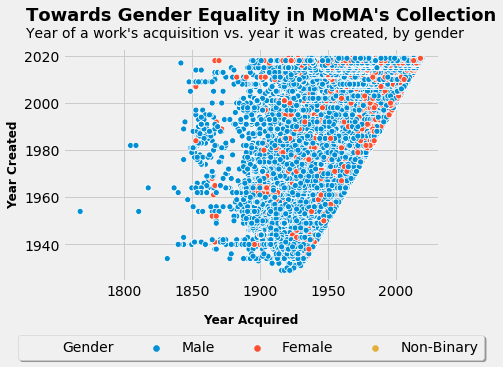

In [0]:
plt.style.use('fivethirtyeight')

fig = plt.figure()
ax = sns.scatterplot(x="Date", y="DateAcquired_Year", hue="Gender", data=merged2)

# move legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)

# set title and subtitle
ax.text(x=1728, y=2035, s="Towards Gender Equality in MoMA's Collection", fontweight='bold', fontsize='18')
ax.text(x=1728, y=2028, s="Year of a work's acquisition vs. year it was created, by gender", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Year Created', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Year Acquired', fontsize=12, fontweight='bold', labelpad=15)


plt.show()

## What do women create? What do men create?

<Figure size 720x720 with 0 Axes>

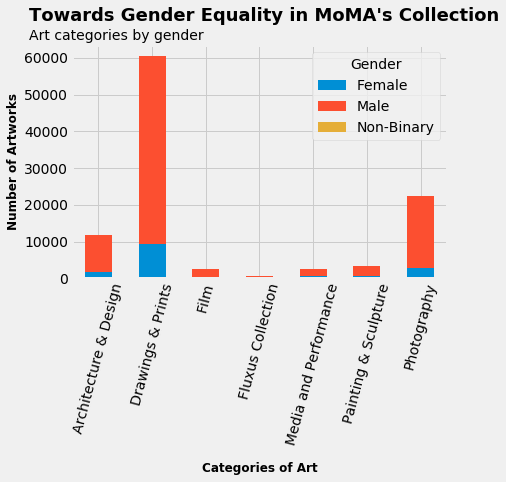

In [0]:
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(10,10))

ax = ct_gender.plot.bar(stacked=True)

# set title and subtitle
ax.text(x=-1.3, y=70000, s="Towards Gender Equality in MoMA's Collection", fontweight='bold', fontsize='18')
ax.text(x=-1.3, y=65000, s="Art categories by gender", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Number of Artworks', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Categories of Art', fontsize=12, fontweight='bold', labelpad=15)

# rotate labels
plt.xticks(rotation=75)



plt.show();

## Do acquisitions look different by nationality?

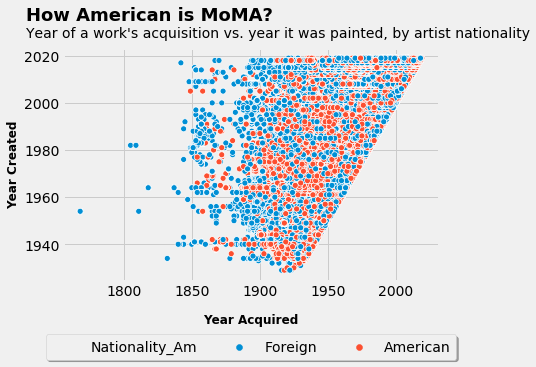

In [0]:
plt.style.use('fivethirtyeight')

fig = plt.figure()
ax = sns.scatterplot(x="Date", y="DateAcquired_Year", hue="Nationality_Am", data=merged2)

# move legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)

# set title and subtitle
ax.text(x=1728, y=2035, s="How American is MoMA?", fontweight='bold', fontsize='18')
ax.text(x=1728, y=2028, s="Year of a work's acquisition vs. year it was painted, by artist nationality", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Year Created', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Year Acquired', fontsize=12, fontweight='bold', labelpad=15)


plt.show()

<Figure size 432x288 with 0 Axes>

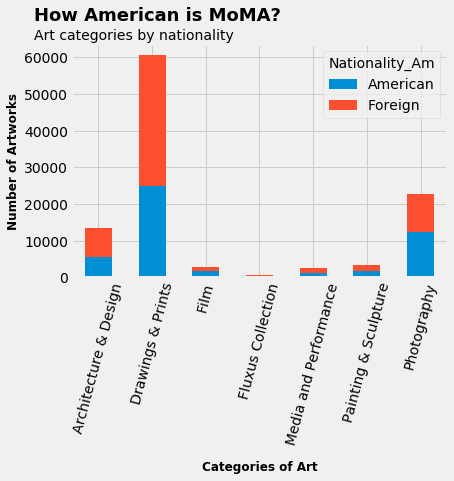

In [0]:
plt.style.use('fivethirtyeight')

fig = plt.figure()

ax = ct_am.plot.bar(stacked=True)

# set title and subtitle
ax.text(x=-1.2, y=70000, s="How American is MoMA?", fontweight='bold', fontsize='18')
ax.text(x=-1.2, y=65000, s="Art categories by nationality", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Number of Artworks', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Categories of Art', fontsize=12, fontweight='bold', labelpad=15)

# rotate labels
plt.xticks(rotation=75)

plt.show();

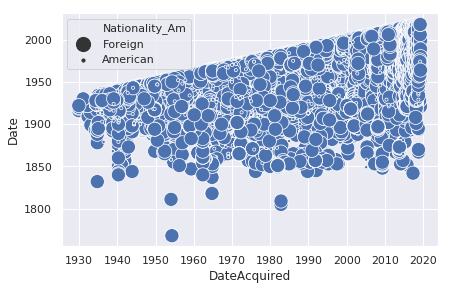

In [0]:
import seaborn as sns
sns.set()

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="DateAcquired", y="Date",
                     size="Nationality_Am",
                     palette=cmap, sizes=(10, 200),
                     data=merged2)

## Trends in Acquisition by Category, Gender

In [0]:
mean_male = male['art-age'].mean()

means = [male['art-age'].mean(), female['art-age'].mean()]

In [0]:
label = ['Male', 'Female']

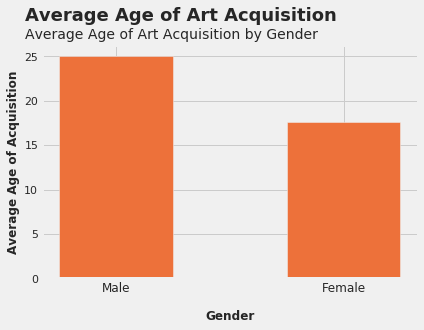

In [0]:
plt.style.use('fivethirtyeight')

fig = plt.figure()

# arange is numpymethod that generates an array of sequential numbers
index = np.arange(len(label))

plt.bar(index, means, width=0.5, color='#ED713A', align='center')

# set title and subtitle
plt.text(x=-.4, y=29, s="Average Age of Art Acquisition", fontweight='bold', fontsize='18')
plt.text(x=-.4, y=27, s="Average Age of Art Acquisition by Gender", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Average Age of Acquisition', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Gender', fontsize=12, fontweight='bold', labelpad=15)

plt.xticks(index, label, fontsize=12, rotation=0)


plt.show()


In [0]:
ct_dep_f_1 = pd.crosstab(female['DateAcquired'], female['Department'])


ct_dep_m_1 = pd.crosstab(male['DateAcquired'], male['Department'])


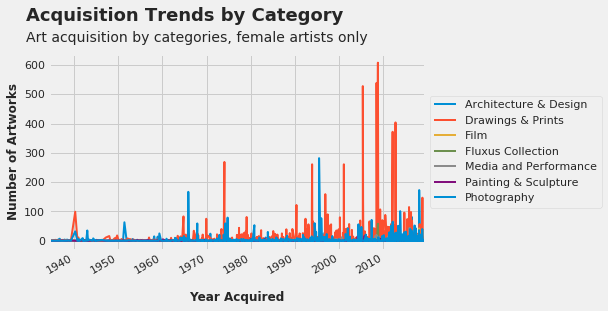

In [0]:
plt.style.use('fivethirtyeight')

fig = plt.figure()

ax = plt.gca()

ct_dep_f_1.plot.line(linewidth=2, ax=ax)

# set title and subtitle
plt.text(704250, 750, s="Acquisition Trends by Category", fontweight='bold', fontsize='18')
ax.text(704250, y=680, s="Art acquisition by categories, female artists only", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Number of Artworks', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Year Acquired', fontsize=12, fontweight='bold', labelpad=15)

# move legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show();

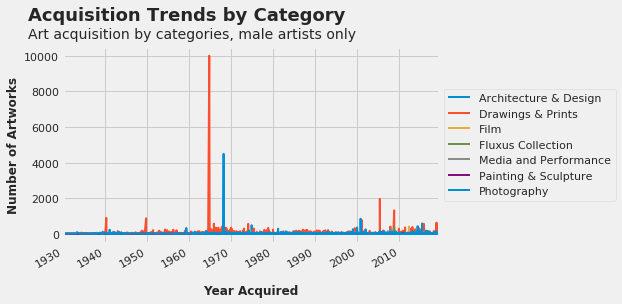

In [0]:
plt.style.use('fivethirtyeight')

fig = plt.figure()

ax = plt.gca()

ct_dep_m_1.plot.line(linewidth=2, ax=ax)

# set title and subtitle
plt.text(701500, 12000, s="Acquisition Trends by Category", fontweight='bold', fontsize='18')
ax.text(701500, y=11000, s="Art acquisition by categories, male artists only", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Number of Artworks', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Year Acquired', fontsize=12, fontweight='bold', labelpad=15)

# move legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show();

In [0]:
ct_dep_f_2 = pd.crosstab(female['Date'], female['Department'])


ct_dep_m_2 = pd.crosstab(male['Date'], male['Department'])


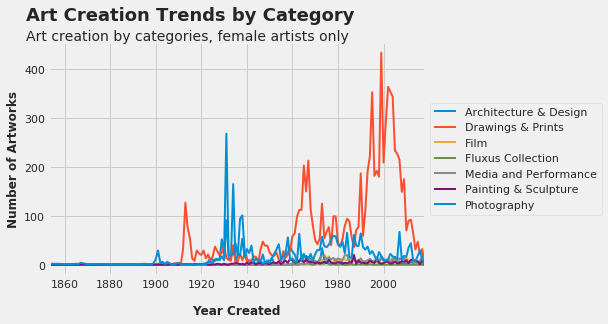

In [0]:
plt.style.use('fivethirtyeight')

fig = plt.figure()

ax = plt.gca()

ct_dep_f_2.plot.line(linewidth=2, ax=ax)

# set title and subtitle
plt.text(1843, 500, s="Art Creation Trends by Category", fontweight='bold', fontsize='18')
ax.text(1843, 460, s="Art creation by categories, female artists only", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Number of Artworks', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Year Created', fontsize=12, fontweight='bold', labelpad=15)

# move legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show();

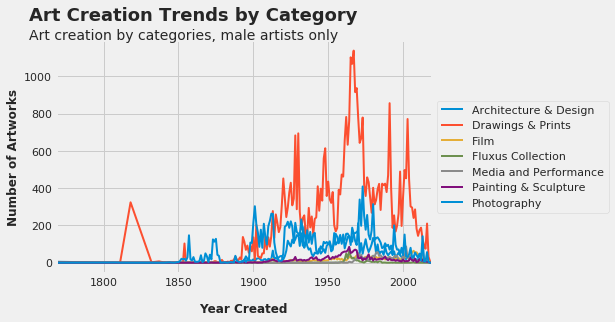

In [0]:
plt.style.use('fivethirtyeight')

fig = plt.figure()

ax = plt.gca()

ct_dep_m_2.plot.line(linewidth=2, ax=ax)

# set title and subtitle
plt.text(1750, 1300, s="Art Creation Trends by Category", fontweight='bold', fontsize='18')
ax.text(1750, 1200, s="Art creation by categories, male artists only", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Number of Artworks', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Year Created', fontsize=12, fontweight='bold', labelpad=15)

# move legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show();

In [0]:
ct_dep_f_3 = pd.crosstab(female['art-age'], female['Department'])
ct_dep_f_3

ct_dep_m_3 = pd.crosstab(male['art-age'], male['Department'])
ct_dep_m_3

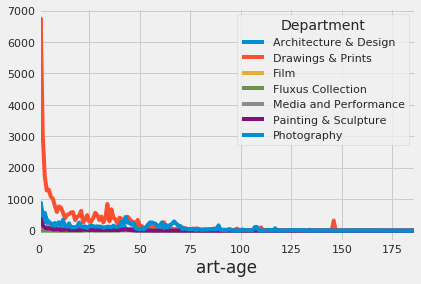

In [0]:
ax = ct_dep_m_3.plot.line()

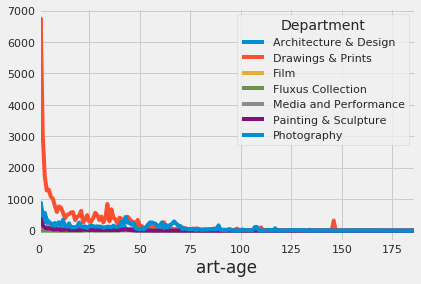

In [0]:
ax = ct_dep_m_3.plot.line()